In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, ZeroPadding2D, Dropout, MaxPool2D, SimpleRNN
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [8]:
import os

# Get the current working directory
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

Current working directory: c:\Programming\ML\machine-learning\box_assigner\Titanic---project-1


In [9]:
data = pd.read_csv('c:/Programming/ML/machine-learning/box_assigner/individual_stocks_5yr/A_data.csv')
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,45.07,45.35,45.00,45.08,1824755,A
1,2013-02-11,45.17,45.18,44.45,44.60,2915405,A
2,2013-02-12,44.81,44.95,44.50,44.62,2373731,A
3,2013-02-13,44.81,45.24,44.68,44.75,2052338,A
4,2013-02-14,44.72,44.78,44.36,44.58,3826245,A


In [10]:
data.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,73.18,73.780,72.510,72.83,2008177,A
1255,2018-02-02,72.32,72.760,71.220,71.25,1955697,A
1256,2018-02-05,70.86,71.480,68.180,68.22,2860726,A
1257,2018-02-06,66.96,68.830,66.130,68.45,4121239,A
1258,2018-02-07,68.19,69.085,67.905,68.06,1988391,A


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


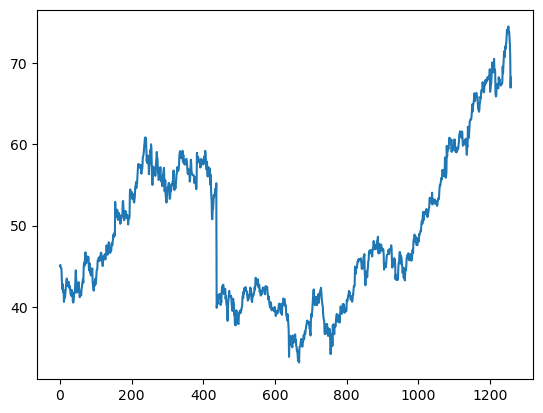

In [12]:
df = data['open']
plt.plot(df)
plt.show()

In [14]:
x = df.values
x[:19]

array([45.07, 45.17, 44.81, 44.81, 44.72, 43.48, 42.21, 42.84, 42.14,
       41.83, 42.09, 40.62, 40.99, 41.78, 41.18, 41.75, 42.35, 43.  ,
       43.3 ])

In [16]:
x_train, x_test = x[:1000], x[1000:]
x_test.shape

(259,)

In [24]:
model = Sequential()
model.add(SimpleRNN(units=64, activation='tanh'))
model.add(Dense(1))

In [25]:
model.compile(optimizer=Adam(), loss='mean_absolute_error')

In [26]:
XT, yT = [], []
for i in range(len(x_train)-90):
    XT.append(x_train[i:i+90])
    yT.append(x_train[i+90])
XT, yT = np.array(XT), np.array(yT)

xt, yt = [], []
for i in range(len(x_test)-90):
    xt.append(x_test[i:i+90])
    yt.append(x_test[i+90])
xt, yt = np.array(xt), np.array(yt)

XT = np.reshape(XT, (XT.shape[0], XT.shape[1], 1))
xt = np.reshape(xt, (xt.shape[0], xt.shape[1], 1))

In [27]:
result = model.fit(XT, yT, epochs = 100, batch_size=20)

Epoch 1/100


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 43.5593
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 38.1887
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 34.5122
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 31.2919
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 28.2310
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 25.1419
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 22.1029
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 19.0767
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 16.0561
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 13.0481
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 10.2342
Epoch 12/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.0791
Epoch 13/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.8360
Epoch 14/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.3629
Epoch 15/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - los

In [28]:
model.evaluate(xt, yt)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.0564 


5.0564093589782715

In [32]:
XTpreict = model.predict(XT)
xtPredict = model.predict(xt)
Xfinal = np.concatenate([XTpreict, xtPredict])

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


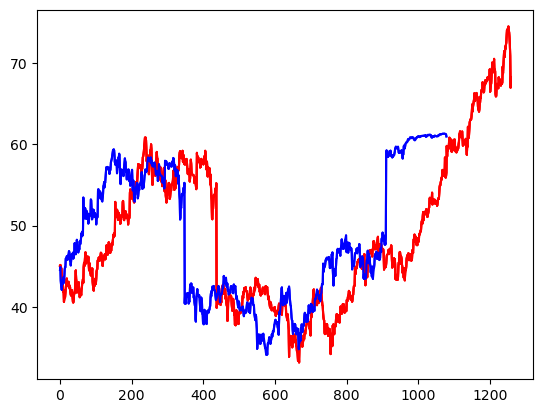

In [34]:
plt.plot(x, color='red')
plt.plot(Xfinal, color='blue')
plt.show()

In [35]:
from tensorflow.keras.layers import GRU, LSTM, Dropout

In [47]:
model_lstm = Sequential([
    tf.keras.layers.LSTM(units=128, activation='tanh', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units=64, activation='tanh'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

# model_lstm.summary()

In [48]:
model_lstm.compile(loss='mean_absolute_error', optimizer='adam')

In [49]:
result_lstm = model_lstm.fit(XT,yT,epochs=10, batch_size=20)

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - loss: 37.7035
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 17.6303
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 8.0384
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 7.8431
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 7.7529
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 7.6897
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 7.7460
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - loss: 7.7300
Epoch 9/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 6.7877
Epoch 10/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - loss: 5.5872


In [50]:
model_lstm.evaluate(xt,yt)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 11.9677


11.967695236206055

In [51]:
XTpreict = model_lstm.predict(XT)
xtPredict = model_lstm.predict(xt)
Xfinal_lstm = np.concatenate([XTpreict, xtPredict], axis=0)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


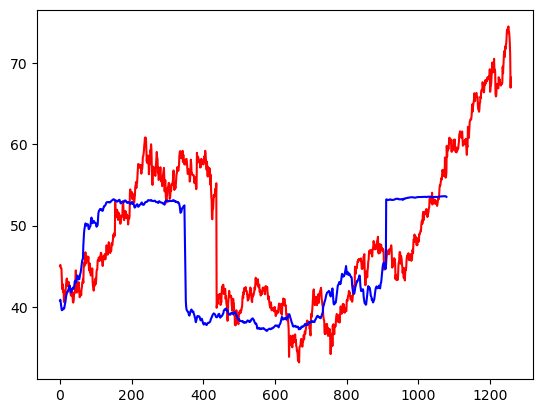

In [52]:
plt.plot(x, color='red')
plt.plot(Xfinal_lstm, color='blue')
plt.show()

In [53]:
model_gru = Sequential([
    tf.keras.layers.GRU(units=128, activation='tanh', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GRU(units=64, activation='tanh'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

model_gru.compile(loss='mean_absolute_error', optimizer='adam')

result_gru = model_gru.fit(XT,yT,epochs=10, batch_size=20)


Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - loss: 40.6920
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - loss: 28.1739
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - loss: 13.0006
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - loss: 8.5322
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - loss: 8.3158
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 8.4052
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 8.5590
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 7.0508
Epoch 9/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - loss: 6.5652
Epoch 10/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - loss: 6.2371


In [54]:
model_gru.evaluate(xt,yt)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 10.6977


10.697694778442383

In [57]:
XTpreict = model_gru.predict(XT)
xtPredict = model_gru.predict(xt)
Xfinal_gru = np.concatenate([XTpreict, xtPredict], axis=0)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


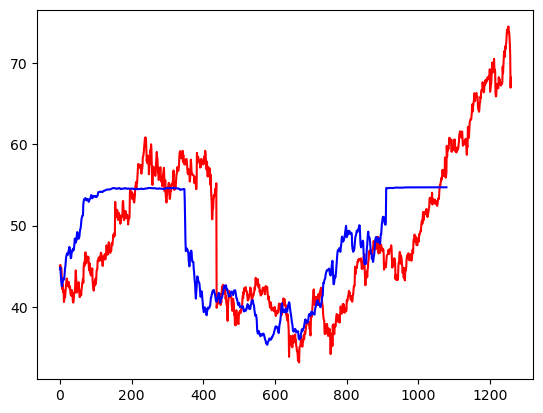

In [58]:
plt.plot(x, color='red')
plt.plot(Xfinal_gru, color='blue')
plt.show()